# Reza Torabi 610300032
# Machine Learning - HW2: Q5

### A) Discriminant Function
### For each class calculate the discriminant function. Then, by subtracting these two functions from each other, find a discriminant function for the problem.

The discriminant function for each class is given by: <br>
$$ g_i(x) = \log p(x \mid C_i) + \log P(C_i) $$
the likleihood function is given by: <br>
$$ p(x \mid C_i) = \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left(-\frac{(x - \mu_i)^2}{2\sigma_i^2}\right) $$
taking the log of the likelihood function, we would have: <br>
$$ \log p(x \mid C_i) = -\frac{1}{2\sigma_i^2}(x - \mu_i)^2 - \frac{1}{2}log{(2\pi\sigma_i^2)} $$
so the discriminant function is given by: <br>
$$ g_i(x) = \log p(x \mid C_i) + \log P(C_i) = -\frac{1}{2\sigma_i^2}(x - \mu_i)^2 - \frac{1}{2}log{(2\pi\sigma_i^2)} + \log P(C_i) $$
so for $ g_1(x) $ and $ g_2(x) $, we would have: <br>
$$ g_1(x) = -\frac{1}{2\sigma_1^2}(x - \mu_1)^2 - \frac{1}{2}log{(2\pi\sigma_1^2)} + \log \pi_1 $$
$$ g_2(x) = -\frac{1}{2\sigma_2^2}(x - \mu_2)^2 - \frac{1}{2}log{(2\pi\sigma_2^2)} + \log \pi_2 $$
substracting the two discriminant functions, we would have: <br>
$$ g(x) = g_1(x) - g_2(x) $$
$$ = -\frac{1}{2\sigma_1^2}(x - \mu_1)^2 - \frac{1}{2}log{(2\pi\sigma_1^2)} + \log \pi_1 + \frac{1}{2\sigma_2^2}(x - \mu_2)^2 + \frac{1}{2}log{(2\pi\sigma_2^2)} - \log \pi_2 $$
$$ = - \frac{1}{2} \log \frac{\sigma_1^2}{\sigma_2^2} 
- \frac{(x - \mu_1)^2}{2\sigma_1^2} + \frac{(x - \mu_2)^2}{2\sigma_2^2} + \log \frac{\pi_1}{\pi_2} $$

### B) Desicion Boundary
### Use the discriminant function $ g(x) $ to find the decision boundary for the minimum-error case.

Decision boundary is where $ g_1(x) = g_2(x) $. so to find the decision boundary we should set $ g(x) = 0 $ :
$$  -\frac{1}{2} \log \frac{\sigma_1^2}{\sigma_2^2} 
- \frac{(x - \mu_1)^2}{2\sigma_1^2} + \frac{(x - \mu_2)^2}{2\sigma_2^2} + \log \frac{\pi_1}{\pi_2} = 0 $$
by solving this equation for $ x $ we get the decision boundary.

### C) How does increasing $\pi_1$ and Decreasing $\pi_2$ effect the Decision Boundary?

We know that $ g_i(x) = \log p(x \mid C_i) + \log \pi_i $ so increasing $\pi_1$ would make the discriminant function $g_1(x)$ larger and decreasing $\pi_2$ would make the discriminant function $g_2(x)$ smaller meaning that class 1 is more likely to be the correct class and class 2 is more likely to be the incorrect class. Also we can see that $ g(x) = g_1(x) - g_2(x) $ would get bigger and this also means that the probability of $ g(x) > 0 which means that class 1 is more likely to be the correct class. further explanation can be found in the voice report.

### D) Disicion Boundary for 100 samples of Class1 and Class2

#### Imports
First we import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

now we find the discriminant function:

Approximate Decision Boundary: x = 3.001
Exact Decision Boundary: x = 3.000


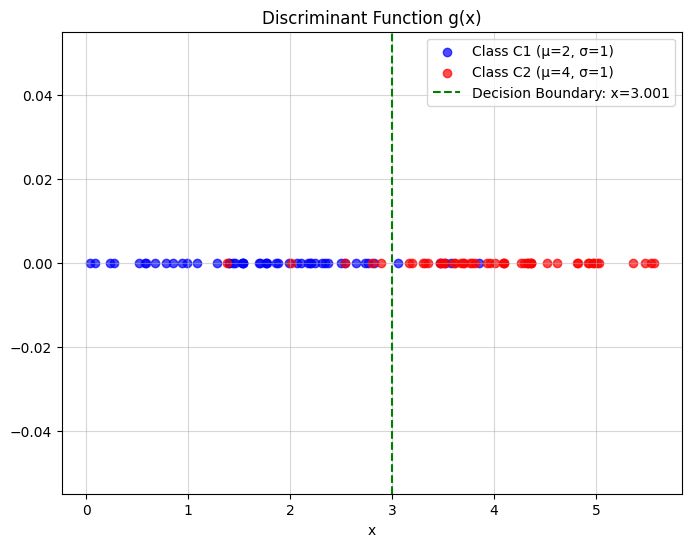

In [ ]:
PRIOR1, PRIOR2 = 0.5, 0.5
MU1, MU2 = 2, 4
SIGMA1, SIGMA2 = 1, 1

def discriminant_function(x, mu, sigma, prior):
    likelihood_term = -np.log(math.sqrt(2 * math.pi) * sigma) - 0.5 * ((x - mu) ** 2 / sigma)
    priori_term = np.log(prior)
    return likelihood_term + priori_term


# first method to find the approximate root of g(x) = 0 therfore the approximate decision boundary
x = np.linspace(-1, 7, 3000)
g1 = discriminant_function(x, MU1, SIGMA1, PRIOR1)
g2 = discriminant_function(x, MU2, SIGMA2, PRIOR2)
g_function = g1 - g2

closest_index = np.argmin(np.abs(g_function))
approx_boundary = x[closest_index]
print(f"Approximate Decision Boundary: x = {approx_boundary:.3f}")


# second method to find the exact root of g(x) = 0 therefore the exact decision boundary
from scipy.optimize import root_scalar
def g(x):
    return discriminant_function(x, MU1, SIGMA1, PRIOR1) - discriminant_function(x, MU2, SIGMA2, PRIOR2)

solution = root_scalar(g, bracket=[-2, 7])
exact_boundary = solution.root
print(f"Exact Decision Boundary: x = {exact_boundary:.3f}")


# making 100 samples of Class1 and Class2 from the given distributions
np.random.seed(42)
data_c1 = np.random.normal(MU1, SIGMA1, 50)
data_c2 = np.random.normal(MU2, SIGMA2, 50)


# plotting our samples and g(x) and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(data_c1, np.zeros_like(data_c1), label='Class C1 (μ=2, σ=1)', alpha=0.7, color='blue')
plt.scatter(data_c2, np.zeros_like(data_c2), label='Class C2 (μ=4, σ=1)', alpha=0.7, color='red')
plt.axvline(approx_boundary, color='green', linestyle='--', label=f'Decision Boundary: x={approx_boundary:.3f}')
plt.title("Discriminant Function g(x)")
plt.xlabel("x")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

### E) Evaluation Metrics
### Based on the decision boundary, assign labels to the data. Then calculate and report the confusion matrix, accuracy, precision, recall, and F1 score for this classifier.

In [3]:
data = np.concatenate([data_c1, data_c2])
true_labels = np.array([1] * 50 + [2] * 50)
predicted_labels = np.where(discriminant_function(data, MU1, SIGMA1, PRIOR1) -
                            discriminant_function(data, MU2, SIGMA2, PRIOR2) > 0, 1, 2)

TP = TN = FP = FN = 0
for true, pred in zip(true_labels, predicted_labels):
    if true == 1 and pred == 1:
        TP += 1 
    elif true == 2 and pred == 2:
        TN += 1 
    elif true == 2 and pred == 1:
        FP += 1
    elif true == 1 and pred == 2:
        FN += 1

confusion_matrix = ([[f"TP: {TP}", "FP: {FP}"], [f"FN: {FN}", f"TN: {TN}"]])
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Confusion Matrix:")
print(f"TP: {TP}\tFP: {FP}\nFN: {FN}\tTN: {TN}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
TP: 45	FP: 5
FN: 5	TN: 45
Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1 Score: 0.9


### F) ROC Curve

-5.129287311628012 5.9193402477595525


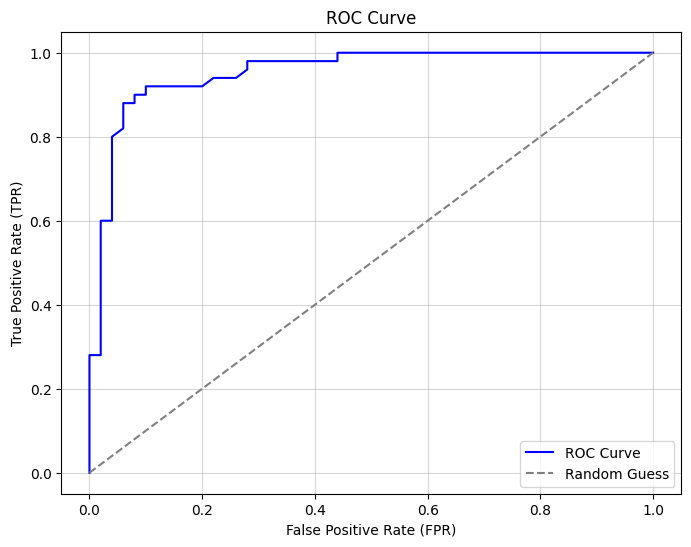

AUROC: 0.9534


In [4]:
g_values = discriminant_function(data, MU1, SIGMA1, PRIOR1) - discriminant_function(data, MU2, SIGMA2, PRIOR2)
print(min(g_values), max(g_values))

tpr_list = []
fpr_list = []
thresholds = np.linspace(-10, 10, 500)

for treshold in thresholds:
    predictions = np.where(g_values > treshold, 1, 2)
    TP = TN = FP = FN = 0
    for true, pred in zip(true_labels, predictions):
        if true == 1 and pred == 1:
            TP += 1 
        elif true == 2 and pred == 2:
            TN += 1 
        elif true == 2 and pred == 1:
            FP += 1
        elif true == 1 and pred == 2:
            FN += 1
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

tpr_array = np.array(tpr_list)
fpr_array = np.array(fpr_list)
auroc = abs(np.trapz(tpr_array, fpr_array))

plt.figure(figsize=(8, 6))
plt.plot(fpr_array, tpr_array, color='blue', label=f"ROC Curve")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()

print(f"AUROC: {auroc:.4f}")

### E) Doing all these steps for prior probability of 0.9 for Class 1 and 0.1 for Class 2.

Approximate Decision Boundary: x = 4.098
Exact Decision Boundary: x = 4.099


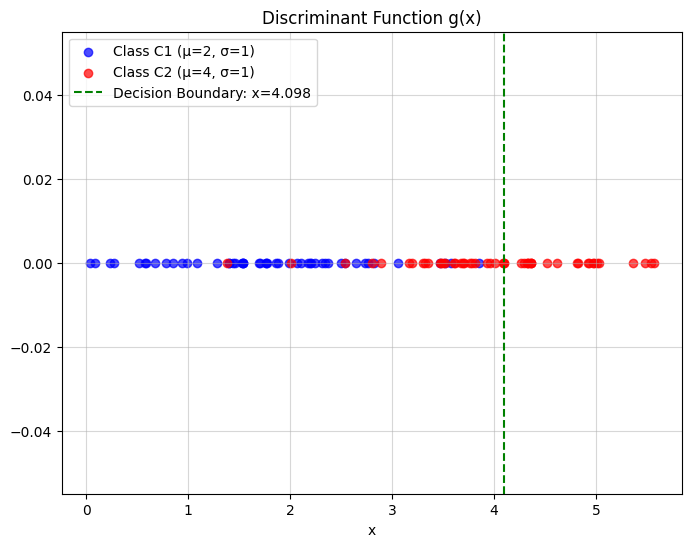

In [5]:
PRIOR1, PRIOR2 = 0.9, 0.1

# first method to find the approximate root of g(x) = 0 therfore the approximate decision boundary
x = np.linspace(-1, 7, 3000)
g1 = discriminant_function(x, MU1, SIGMA1, PRIOR1)
g2 = discriminant_function(x, MU2, SIGMA2, PRIOR2)
g_function = g1 - g2

closest_index = np.argmin(np.abs(g_function))
approx_boundary = x[closest_index]
print(f"Approximate Decision Boundary: x = {approx_boundary:.3f}")


# second method to find the exact root of g(x) = 0 therefore the exact decision boundary
from scipy.optimize import root_scalar
def g(x):
    return discriminant_function(x, MU1, SIGMA1, PRIOR1) - discriminant_function(x, MU2, SIGMA2, PRIOR2)

solution = root_scalar(g, bracket=[-2, 7])
exact_boundary = solution.root
print(f"Exact Decision Boundary: x = {exact_boundary:.3f}")


# making 100 samples of Class1 and Class2 from the given distributions
np.random.seed(42)
data_c1 = np.random.normal(MU1, SIGMA1, 50)
data_c2 = np.random.normal(MU2, SIGMA2, 50)


# plotting our samples and g(x) and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(data_c1, np.zeros_like(data_c1), label='Class C1 (μ=2, σ=1)', alpha=0.7, color='blue')
plt.scatter(data_c2, np.zeros_like(data_c2), label='Class C2 (μ=4, σ=1)', alpha=0.7, color='red')
plt.axvline(approx_boundary, color='green', linestyle='--', label=f'Decision Boundary: x={approx_boundary:.3f}')
plt.title("Discriminant Function g(x)")
plt.xlabel("x")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [6]:
data = np.concatenate([data_c1, data_c2])
true_labels = np.array([1] * 50 + [2] * 50)
predicted_labels = np.where(discriminant_function(data, MU1, SIGMA1, PRIOR1) -
                            discriminant_function(data, MU2, SIGMA2, PRIOR2) > 0, 1, 2)

TP = TN = FP = FN = 0
for true, pred in zip(true_labels, predicted_labels):
    if true == 1 and pred == 1:
        TP += 1 
    elif true == 2 and pred == 2:
        TN += 1 
    elif true == 2 and pred == 1:
        FP += 1
    elif true == 1 and pred == 2:
        FN += 1

confusion_matrix = ([[f"TP: {TP}", "FP: {FP}"], [f"FN: {FN}", f"TN: {TN}"]])
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Confusion Matrix:")
print(f"TP: {TP}\tFP: {FP}\nFN: {FN}\tTN: {TN}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
TP: 50	FP: 28
FN: 0	TN: 22
Accuracy: 0.72
Precision: 0.6410256410256411
Recall: 1.0
F1 Score: 0.7812500000000001


-2.932062734291793 8.116564825095772


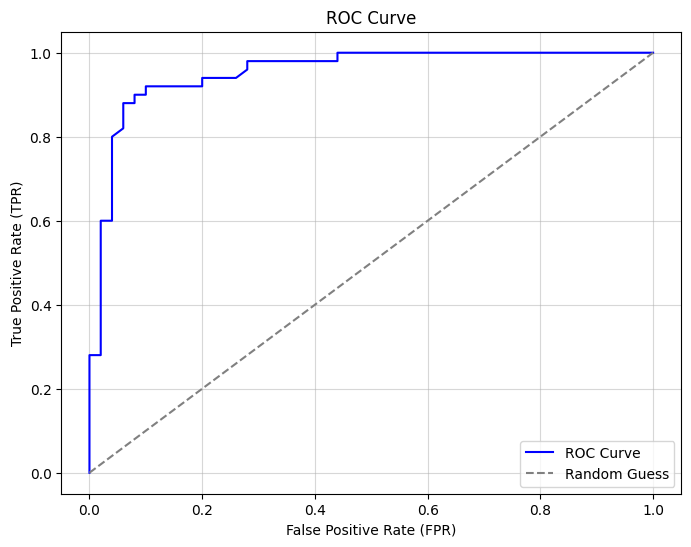

AUROC: 0.9536


In [9]:
g_values = discriminant_function(data, MU1, SIGMA1, PRIOR1) - discriminant_function(data, MU2, SIGMA2, PRIOR2)
print(min(g_values), max(g_values))

tpr_list = []
fpr_list = []
thresholds = np.linspace(-10, 10, 500)

for treshold in thresholds:
    predictions = np.where(g_values > treshold, 1, 2)
    TP = TN = FP = FN = 0
    for true, pred in zip(true_labels, predictions):
        if true == 1 and pred == 1:
            TP += 1 
        elif true == 2 and pred == 2:
            TN += 1 
        elif true == 2 and pred == 1:
            FP += 1
        elif true == 1 and pred == 2:
            FN += 1
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

tpr_array = np.array(tpr_list)
fpr_array = np.array(fpr_list)
auroc = abs(np.trapz(tpr_array, fpr_array))

plt.figure(figsize=(8, 6))
plt.plot(fpr_array, tpr_array, color='blue', label=f"ROC Curve")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()

print(f"AUROC: {auroc:.4f}")